<h1> Data Visualization and Exploration

<h3>Problem Statement:</h3> In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

<h3> Problem Objective:</h3> To combine historical credit data with machine learning models, in order to predict the likelihood of default of credit card payment.

<h3> Data Import and Attributes Finding</h3>

Loading the data, understanding the size, data types and attribute names.

In [1]:
#Importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Loading and viewing the 
loan = pd.read_csv('loanprediction.csv')
loan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Each row represents the data gathered from Taiwan Customer loan payment default: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [3]:
loan.info()
loan.isnull().sum().sum()
loan.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<i>The data consists of 25 columns and shows no missing info for any of the 30,000 instances</i>

<b>Understanding the data dictionary</b>

<b>DEFAULT</b>: Default payment next month (1 = yes, 0 = no)

<b>LIMIT_BAL</b>: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

<b>GENDER</b>: Gender (1 = male; 2 = female).

<b>EDUCATION</b>: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

<b>MARRIAGE</b>: Marital status (1 = married; 2 = single; 3 = others).

<b>AGE</b>: Age (year).

<b>PAY_1 ~ PAY_6</b>: History of past payment.
We tracked the past monthly payment records (from April to September, 2005) as follows:
PAY_1 = the repayment status in September, 2005
PAY_2 = the repayment status in August, 2005;
. . .;
PAY_6 = the repayment status in April, 2005.

<b>The measurement scale for the repayment status is:</b>

-2 = no consumption;

-1 = pay duly;

1 = payment delay for one month;

2 = payment delay for two months;
. . .;

8 = payment delay for eight months;

9 = payment delay for nine months and above.

<b>BILL_AMT1 ~ BILL_AMT6</b>: Amount of bill statement (NT dollar).

BILL_AMT1 = amount of bill statement in September, 2005;

BILL_AMT2 = amount of bill statement in August, 2005;

. . .;

BILL_AMT6 = amount of bill statement in April, 2005.


<b>PAY_AMT1 ~ PAY_AMT6</b>: Amount of payment for previous month (NT dollar).

PAY_AMT1 = amount paid in September, 2005;

PAY_AMT2 = amount paid in August, 2005;
. . .;
PAY_AMT6 = amount paid in April, 2005.

<h3>Generating a Statistical Summary

In [4]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<b>There are 30,000 loan clients<br>
<b>The average loan limit is 167484.322667<br>
<b>The max of Education 6, which is different from the assumption of the data dictionary<br>
<b>The max of Marriage is 3, which is also out of line with the data dictionary<br>

1. These attributes have different sclaes and may need to be normalized
2. Some histograms are tail heavy and extend to the right of the median
3. There are a number of categorical variables

<h3>Data Exploration

<b>Handling Discrepancies

<b> 1. Education
    From data dictionary: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [5]:
#Replacing values greater than 4 with 4
loan['EDUCATION'] = loan['EDUCATION'].apply(lambda edu_level: 4 if edu_level > 3 else edu_level)

#Checking there is no value above 4
loan['EDUCATION'].describe()

count    30000.000000
mean         1.840400
std          0.744097
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

<b> 2. Marriage
    From data dictionary:  Marital status (1 = married; 2 = single; 3 = others)

In [6]:
#Replacing values 0 and greater than 2 with 2,  i.e, others
loan['MARRIAGE'] = loan['MARRIAGE'].apply(lambda mar_level: 3 if mar_level == 0 or mar_level > 2 else mar_level)

#Checking there is no value above 2
loan['MARRIAGE'].describe()

count    30000.000000
mean         1.557267
std          0.521405
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

<b> 3. Renaming "default payment next month" and PAY_0 to default_next and PAY_1 respectively

In [7]:
#Renaming
loan = loan.rename(columns={'default payment next month': 'default_next', 'PAY_0' : 'PAY_1'})

#Checking dataset for implementation
loan.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next'],
      dtype='object')

In [8]:
#Converting complete payment/no consumption to zero

PAY = ['PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i in PAY:
    loan[i] = loan[i].apply(lambda pay_level: 0 if pay_level < 0  else pay_level)
loan[PAY].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


<b> Visualizing the different attributes

In [9]:
loan_categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [10]:
#frequency of default and non-default
loan['default_next'].value_counts()

# Converting values to percentage as percentages.

default_percent = round(loan['default_next'].value_counts(normalize=True).apply(lambda x: x * 100)[1], 2)
non_default_percent = round(loan['default_next'].value_counts(normalize=True).apply(lambda x: x * 100)[0], 2)

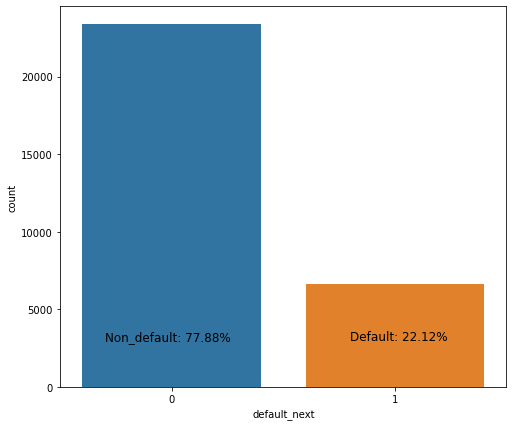

In [11]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(x ='default_next', data = loan)
plt.annotate('Non_default: {}%'.format(non_default_percent), xy=(-0.3, 3000), size=12)
plt.annotate('Default: {}%'.format(default_percent), xy=(0.8,3000), size=12)
plt.show()
    

<b><i> *This shows that the data is unbalanced, in terms of the output label category

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

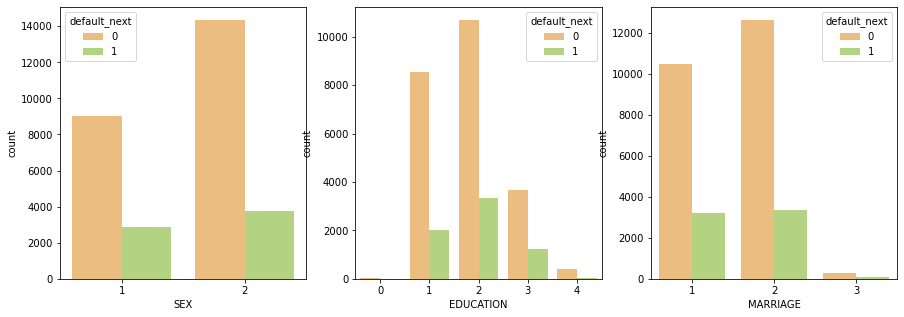

In [12]:
f, axis = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x='SEX', hue='default_next', data=loan, palette='RdYlGn', ax=axis[0] )
sns.countplot(x='EDUCATION', hue='default_next', data=loan, palette='RdYlGn', ax=axis[1])
sns.countplot(x='MARRIAGE', hue='default_next', data=loan, palette='RdYlGn', ax=axis[2])


In [13]:
loan['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [14]:
loan['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      454
0       14
Name: EDUCATION, dtype: int64

In [15]:
loan['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<i>From the countplots, it may be tempting to make certain inferences. However, the value counts show an uneven distribution among each group

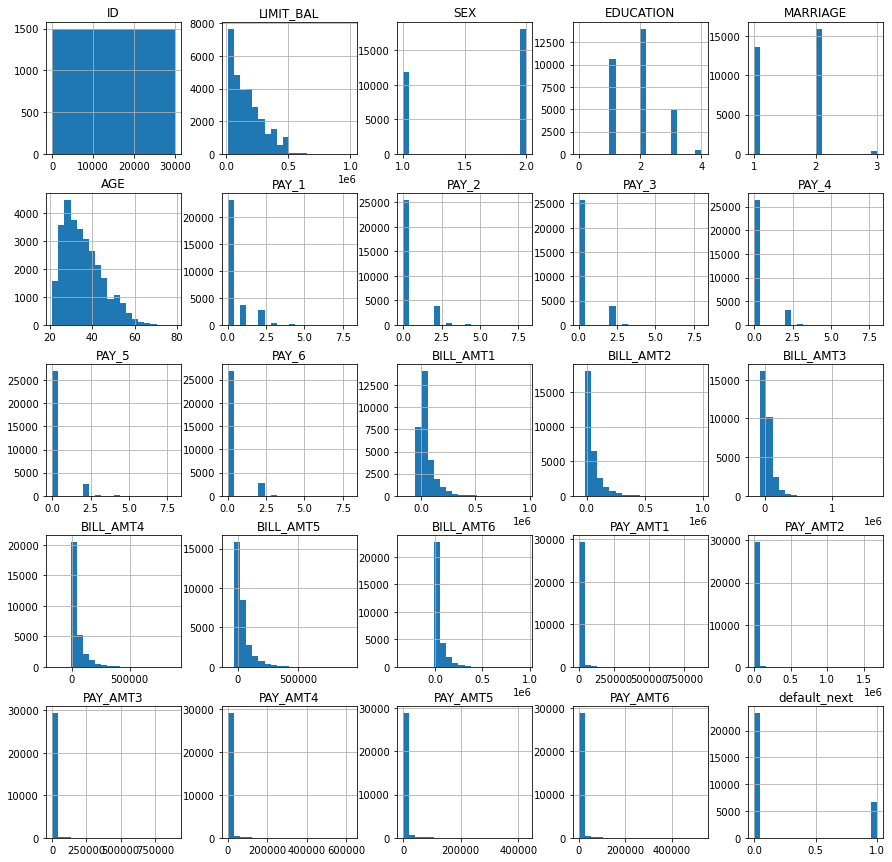

In [16]:
#Frequency Distribution of all data

loan.hist(bins=20, figsize=(15,15))
plt.show()

<h2>Feature Selection
<h4>Generating Correlation Matrix and Scatter Plot

In [17]:
#Standard Correlation Coefficient
corr_matrix = loan.corr()
corr_matrix["default_next"].sort_values(ascending=False)

default_next    1.000000
PAY_1           0.396019
PAY_2           0.327093
PAY_3           0.286999
PAY_4           0.269055
PAY_5           0.260850
PAY_6           0.244437
EDUCATION       0.035197
AGE             0.013890
BILL_AMT6      -0.005372
BILL_AMT5      -0.006760
BILL_AMT4      -0.010156
ID             -0.013952
BILL_AMT3      -0.014076
BILL_AMT2      -0.014193
BILL_AMT1      -0.019644
MARRIAGE       -0.027575
SEX            -0.039961
PAY_AMT6       -0.053183
PAY_AMT5       -0.055124
PAY_AMT3       -0.056250
PAY_AMT4       -0.056827
PAY_AMT2       -0.058579
PAY_AMT1       -0.072929
LIMIT_BAL      -0.153520
Name: default_next, dtype: float64

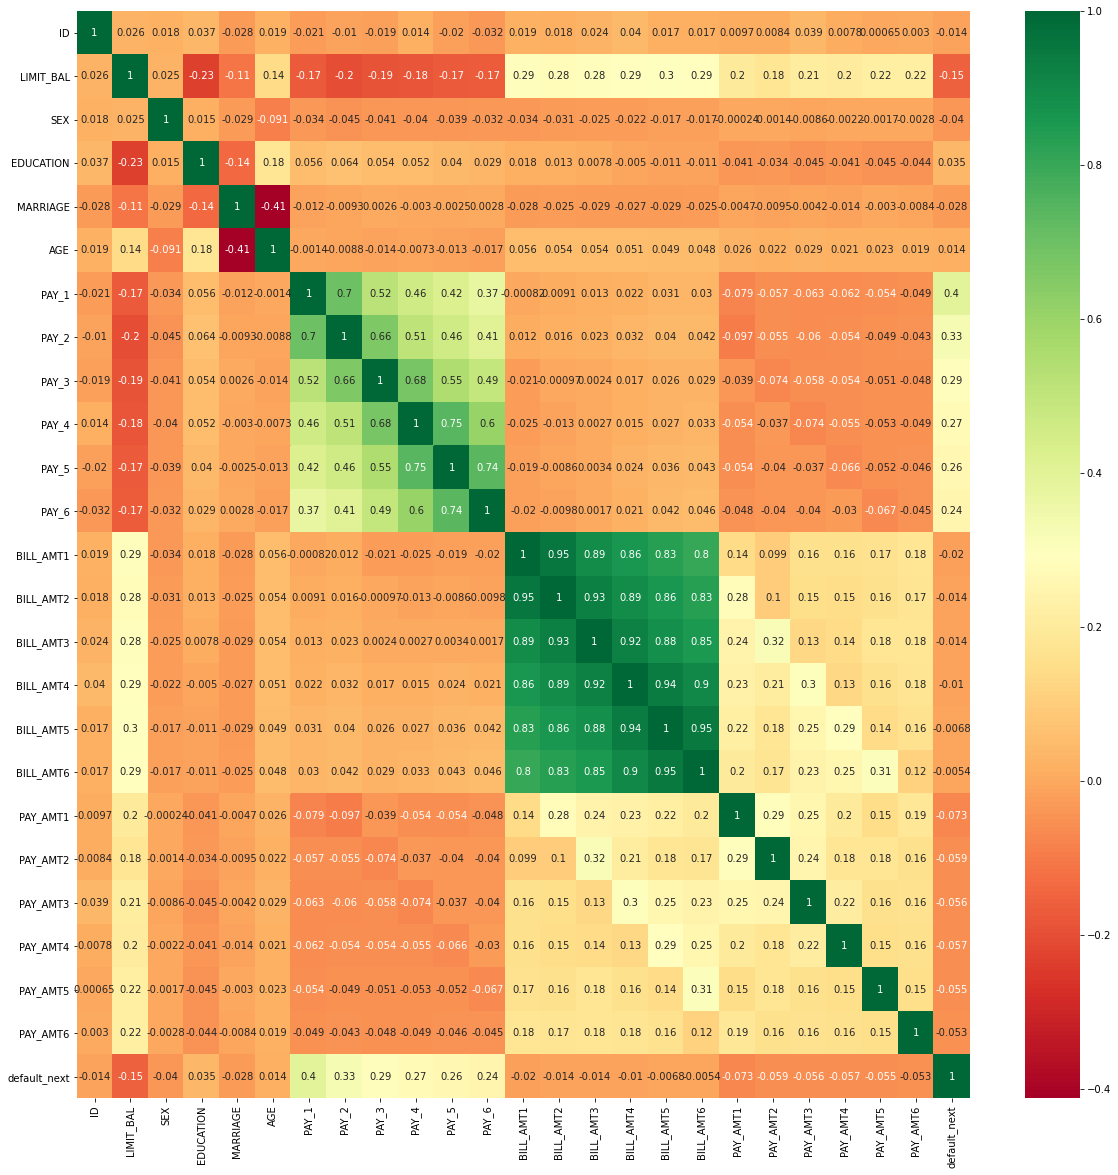

In [18]:
#displaying only lower triangle of heatmap
# mask = np.zeros_like(corr_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True)
plt.show()

<i><b>From the correlation matrix, the payment histories seem to correlate best with the likelihood of payment. <br>The limit balance is the most negatively correlated feature

<b>Splitting Data and Feature Scaling of Numerical Attributes

In [19]:
#Dropping ID Column
loan.drop(['ID'], axis = 1, inplace = True)

<h3>Prepare Data for Machine Learning

In [20]:
loan_numericals = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4',
                    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 
                'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL', 'AGE']

loan_prepared = loan.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
loan_prepared[loan_numericals] = scaler.fit_transform(loan[loan_numericals])
loan_prepared.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next
0,0.010101,2,2,1,0.051724,2,2,0,0,0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0.111111,2,2,2,0.086207,0,2,0,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0.080808,2,2,2,0.224138,0,0,0,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0.040404,2,2,1,0.275862,0,0,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0.040404,1,2,1,0.620690,0,0,0,0,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


In [21]:
#Separating data in X and Y
X = loan_prepared.iloc[:,:-1].values
y = loan_prepared.iloc[:,-1].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

<h3> Applying Naive Bayes

<b>Training

In [22]:
from sklearn.naive_bayes import MultinomialNB 
naive_bayes = MultinomialNB(alpha=0.1) 
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

<b>Predicting

In [23]:
y_pred = naive_bayes.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 1]


<b>Checking Performance Metrics

<AxesSubplot:>

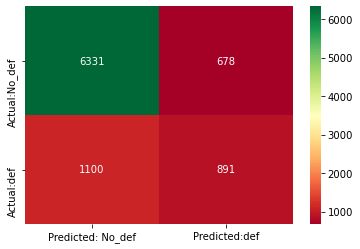

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

cm = pd.DataFrame(data=cm,columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='RdYlGn')

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_absolute_error
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_NB = pd.DataFrame([["Multinomial Naive Bayes", acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision',
                                                                                          'Recall', 'F1 Score', 'ROC'])
model_NB

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Multinomial Naive Bayes,0.802444,0.567878,0.447514,0.500562,0.675391


<i>Using all scaled attributes at the same time on a stratified test_train sample, the accuracy is quite low.<br>
<i>A selection of the top correlating features will now be carried out in steps, by splitting the dataset into three categories

<h3> Making sub datasets
    

<AxesSubplot:>

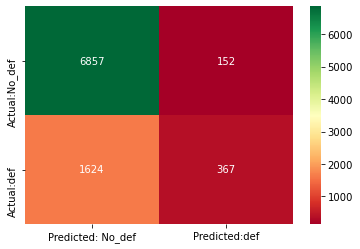

In [26]:
Dataset1 = loan_prepared[['PAY_1', 'PAY_2', 'default_next']]
Dataset2 = loan_prepared[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'default_next']]
Dataset3 = loan_prepared[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4', 'default_next']]
X1 = Dataset1.iloc[:,:-1].values
y1 = Dataset1.iloc[:,-1].values

X2 = Dataset2.iloc[:,:-1].values
y2 = Dataset2.iloc[:,-1].values

X3 = Dataset3.iloc[:,:-1].values
y3 = Dataset3.iloc[:,-1].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=7, stratify=y)
naive_bayes.fit(X3_train, y3_train)
y3_pred = naive_bayes.predict(X3_test)

cm3 = confusion_matrix(y3_test, y3_pred)
cm3 = pd.DataFrame(data=cm3, columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm3,annot=True,fmt ='d',cmap='RdYlGn')

<h3> KMEANS

[[-0.72247616  0.67253065]
 [-0.70788651  0.87037777]
 [ 0.13504306 -1.46066294]
 ...
 [-0.66106578 -0.23939192]
 [-0.67892727 -0.06343611]
 [-0.63637351 -1.17315623]] (21000, 2)


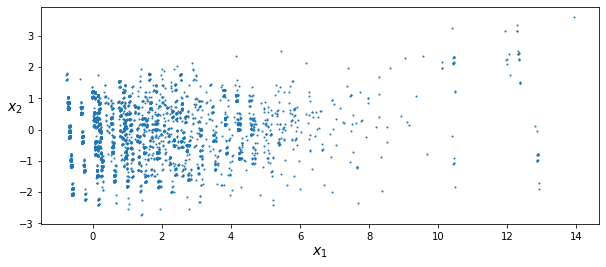

In [27]:
from sklearn.cluster import KMeans


#K-means with dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trainX2D = pca.fit_transform(X_train)
print(trainX2D, trainX2D.shape)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(10, 4))
plot_clusters(trainX2D)
plt.show()

from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=7).fit(trainX2D)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

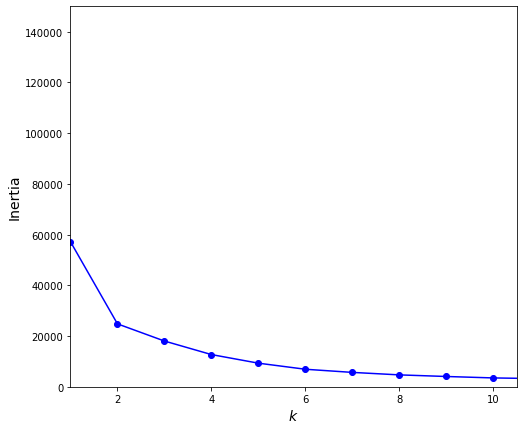

In [28]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 0, 150000])
plt.show()

In [29]:
#Without dimensionality reduction
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[95265.81460173277,
 62799.256184744234,
 54541.35051474733,
 47450.11492273916,
 43708.823132489764,
 40241.5230941567,
 38315.177928798556,
 35719.73919355649,
 34051.200616556474,
 31252.13332547471,
 29437.35324201231,
 28271.134167729826,
 26920.824923577034,
 25565.012818909792,
 24361.20181889601,
 23163.853089463635,
 21974.378194844932,
 21550.68260659624,
 20485.00720049411]

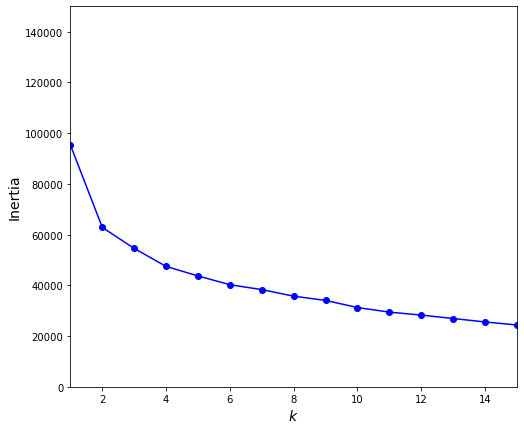

In [30]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 15, 0, 150000])
plt.show()

In [31]:
#We observe an elbow at k = 2 for both cases
#using K = 2

kmeans = KMeans(n_clusters=2, random_state=7)
kmeans.fit(X_train)
y_pred_kmeans2 = kmeans.predict(X_train)

In [32]:
print("Accuracy:",accuracy_score(y_train, y_pred_kmeans2))

Accuracy: 0.8019047619047619


In [33]:
confusion_matrix(y_train, y_pred_kmeans2)

array([[15356,   999],
       [ 3161,  1484]], dtype=int64)

In [34]:
#Applying K-means to test data

# kmeans = KMeans(n_clusters=2, random_state=7)

kmeans.fit(X_train)
y_pred_kmeans_test = kmeans.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_kmeans_test))

Accuracy: 0.8105555555555556


[[-0.72247616  0.67253065]
 [-0.70788651  0.87037777]
 [ 0.13504306 -1.46066294]
 ...
 [-0.66106578 -0.23939192]
 [-0.67892727 -0.06343611]
 [-0.63637351 -1.17315623]] (21000, 2)


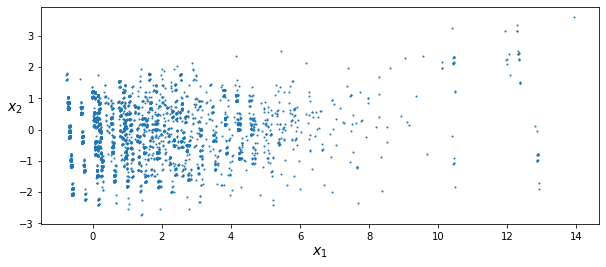

In [35]:
#Applying PCA for visualization
pca2 = PCA(n_components=2)
testX2D = pca2.fit_transform(X_train)
print(testX2D, testX2D.shape)

plt.figure(figsize=(10, 4))
plot_clusters(testX2D)
plt.show()

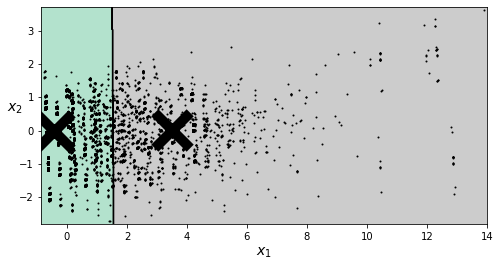

In [36]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_kmeans = kmeans.fit_predict(trainX2D)

X = trainX2D
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False) 
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred_kmeans_test))

print("Precision:", precision_score(y_test, y_pred_kmeans_test))

print("Recall Score:", recall_score(y_test, y_pred_kmeans_test))

print(f"f1_score:", f1_score(y_test, y_pred_kmeans_test))

Accuracy: 0.8105555555555556
Precision: 0.6283662477558348
Recall Score: 0.3515821195379206
f1_score: 0.45088566827697263


<h4> Making Conclusions

The optimal number of clusters using the elbow method was determined to be at k=2, which is the same as the number of classes availabe in the original dataset. 
The k-means clustering method produced an accuracy of 81% on the test samples, which is slightly higher than the accuracy on test samples, using Naive-bayes.

<h3> Decision Tree

In [38]:
#Importing the required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Specify Model
DT_class = DecisionTreeClassifier(random_state=7)

# Fit Model to all features in the dataset
DT_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

Accuracy: 0.9994285714285714
Precision: 0.9997842502696872
Recall Score: 0.9976318622174382
f1_score: 0.9987068965517242
ROC Area: 0.9987853594181045
Mean Absolute Error: 0.0005714285714285715


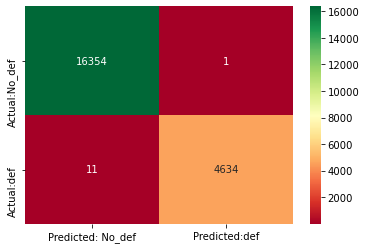

In [39]:
#Making Predictions and evaluating metrics on training set
DT_pred1_train = DT_class.predict(X_train)

cm_DT1_train = confusion_matrix(y_train, DT_pred1_train)
cm_DT1_train = pd.DataFrame(data=cm_DT1_train,columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm_DT1_train,annot=True,fmt ='d',cmap='RdYlGn')


print("Accuracy:", accuracy_score(y_train, DT_pred1_train))

print("Precision:", precision_score(y_train, DT_pred1_train))

print("Recall Score:", recall_score(y_train, DT_pred1_train))

print(f"f1_score:", f1_score(y_train, DT_pred1_train))

print(f"ROC Area:", roc_auc_score(y_train, DT_pred1_train))

print(f"Mean Absolute Error:", mean_absolute_error(y_train, DT_pred1_train))

In [40]:
#Carrying out stratified 10-fold cross validation on the training set
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(random_state=7), X=X_train, y=y_train, cv=10)

print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.70952381 0.72428571 0.71428571 0.7252381  0.7152381  0.71333333
 0.70380952 0.70857143 0.7252381  0.71142857]
Cross Validation accuracy: 0.715 +/- 0.007


It can be seen that applying the decision tree classifier to the training set gives an accuracy of 99%, which may be due to overfitting to the training set. Using a 10-fold cross validation leads to an accuracy of about 71%.

Accuracy: 0.731
Precision: 0.40037071362372567
Recall Score: 0.4339527875439478
f1_score: 0.41648590021691967
ROC Area: 0.624666506484201
Mean Absolute Error: 0.269


<AxesSubplot:>

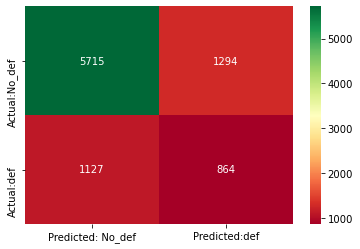

In [41]:
#Evaluation Metrics on test set

DT_class.fit(X_train, y_train)

DT_pred1_test = DT_class.predict(X_test)

print("Accuracy:", accuracy_score(y_test, DT_pred1_test))

print("Precision:", precision_score(y_test, DT_pred1_test))

print("Recall Score:", recall_score(y_test, DT_pred1_test))

print(f"f1_score:", f1_score(y_test, DT_pred1_test))

print(f"ROC Area:", roc_auc_score(y_test, DT_pred1_test))

print(f"Mean Absolute Error:", mean_absolute_error(y_test, DT_pred1_test))

cm_DT1_test = confusion_matrix(y_test, DT_pred1_test)
cm_DT1_test = pd.DataFrame(data=cm_DT1_test, columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm_DT1_test,annot=True,fmt ='d',cmap='RdYlGn')

The decision tree produced an accuracy of 73% on the test set, as compared to a 99.9% accuracy on the training dataset. This shows that the decision tree does not generalize well to unsee data but overfits on training data.

Accuracy: 0.9808095238095238
Precision: 0.9932558139534884
Recall Score: 0.9194833153928956
f1_score: 0.9549468977082168
ROC Area: 0.9588550786686275
Mean Absolute Error: 0.019190476190476192


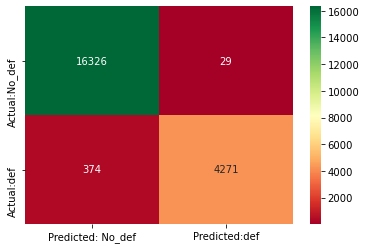

In [42]:
#Using only top ten features
#Making Predictions and evaluating metrics on training set

DT_class_top10 = DecisionTreeClassifier(random_state=7)

# Fit Model to top ten features in the dataset
DT_class_top10.fit(X3_train, y3_train)
DT_pred_train_top10 = DT_class_top10.predict(X3_train)

cm_DT_top10_train = confusion_matrix(y3_train, DT_pred_train_top10)
cm_DT_top10_train = pd.DataFrame(data=cm_DT_top10_train, columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm_DT_top10_train,annot=True,fmt ='d',cmap='RdYlGn')


print("Accuracy:", accuracy_score(y3_train, DT_pred_train_top10))

print("Precision:", precision_score(y3_train, DT_pred_train_top10))

print("Recall Score:", recall_score(y3_train, DT_pred_train_top10))

print(f"f1_score:", f1_score(y3_train, DT_pred_train_top10))

print(f"ROC Area:", roc_auc_score(y3_train, DT_pred_train_top10))

print(f"Mean Absolute Error:", mean_absolute_error(y3_train, DT_pred_train_top10))


Accuracy: 0.732
Precision: 0.3929842399593289
Recall Score: 0.38824711200401807
f1_score: 0.39060131379484586
ROC Area: 0.6089473539760425
Mean Absolute Error: 0.268


<AxesSubplot:>

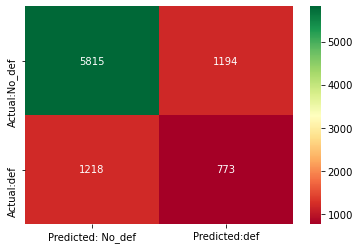

In [43]:
#Evaluation Metrics on test set with ten attributes only


DT_pred_test_top10 = DT_class_top10.predict(X3_test)

print("Accuracy:", accuracy_score(y3_test, DT_pred_test_top10))

print("Precision:", precision_score(y3_test, DT_pred_test_top10))

print("Recall Score:", recall_score(y3_test, DT_pred_test_top10))

print(f"f1_score:", f1_score(y3_test, DT_pred_test_top10))

print(f"ROC Area:", roc_auc_score(y3_test, DT_pred_test_top10))

print(f"Mean Absolute Error:", mean_absolute_error(y3_test, DT_pred_test_top10))

cm_DT_top10_test = confusion_matrix(y3_test, DT_pred_test_top10)
cm_DT_top10_test = pd.DataFrame(data=cm_DT_top10_test, columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm_DT_top10_test,annot=True,fmt ='d',cmap='RdYlGn')

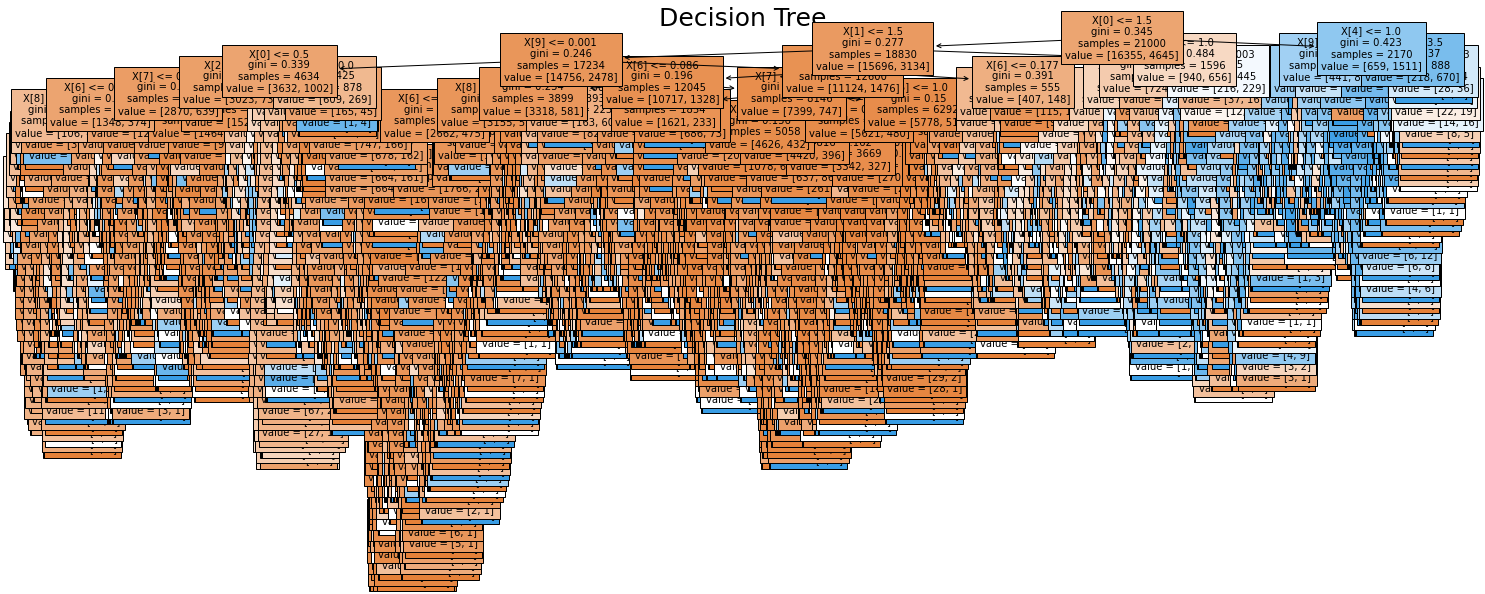

In [44]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(25, 10))

tree.plot_tree(DT_class_top10,fontsize=10,filled=True)
plt.title("Decision Tree",size=25)
plt.show()

In [45]:
#Experimenting with different decision tree parameters
#Tree depth, confidence threshold for prunning, splitting criteria, minimum number of instances

In [46]:
#Checking sensitivity on maximum tree depth
for max_depth in range(5, 16):
    DT_top10_md = DecisionTreeClassifier(max_depth = max_depth, random_state=7)
    DT_top10_md.fit(X3_train, y3_train)
    DTpred_top_10_md = DT_top10_md.predict(X3_test)
    print(f"Accuracy prediction_max_depth {max_depth}: {round(accuracy_score(y3_test, DTpred_top_10_md), 2)}")

Accuracy prediction_max_depth 5: 0.82
Accuracy prediction_max_depth 6: 0.82
Accuracy prediction_max_depth 7: 0.82
Accuracy prediction_max_depth 8: 0.82
Accuracy prediction_max_depth 9: 0.82
Accuracy prediction_max_depth 10: 0.81
Accuracy prediction_max_depth 11: 0.8
Accuracy prediction_max_depth 12: 0.8
Accuracy prediction_max_depth 13: 0.8
Accuracy prediction_max_depth 14: 0.8
Accuracy prediction_max_depth 15: 0.8


In [47]:
#Checking sensitivity on minimum number of samples per split with gini criterion
min_samples_split = [2, 5, 7, 10, 20, 50, 100]
for min_smsplit in min_samples_split:
    DT_top10_mss = DecisionTreeClassifier(min_samples_split = min_smsplit, random_state=7)
    DT_top10_mss.fit(X3_train, y3_train)
    DTpred_top_10_mss = DT_top10_mss.predict(X3_test)
    print(f"Accuracy prediction_min_split {min_smsplit}: {round(accuracy_score(y3_test, DTpred_top_10_mss), 2)}")

Accuracy prediction_min_split 2: 0.73
Accuracy prediction_min_split 5: 0.74
Accuracy prediction_min_split 7: 0.75
Accuracy prediction_min_split 10: 0.76
Accuracy prediction_min_split 20: 0.77
Accuracy prediction_min_split 50: 0.8
Accuracy prediction_min_split 100: 0.81


In [48]:
#using entropy criterion for split with entropy criterion
for min_smsplit in min_samples_split:
    DT_top10_mss2 = DecisionTreeClassifier(min_samples_split = min_smsplit, criterion='entropy', random_state=7)
    DT_top10_mss2.fit(X3_train, y3_train)
    DTpred_top_10_mss2 = DT_top10_mss2.predict(X3_test)
    print(f"Accuracy prediction_min_sample_split {min_smsplit}: {round(accuracy_score(y3_test, DTpred_top_10_mss2), 2)}")

Accuracy prediction_min_sample_split 2: 0.73
Accuracy prediction_min_sample_split 5: 0.74
Accuracy prediction_min_sample_split 7: 0.75
Accuracy prediction_min_sample_split 10: 0.76
Accuracy prediction_min_sample_split 20: 0.77
Accuracy prediction_min_sample_split 50: 0.79
Accuracy prediction_min_sample_split 100: 0.81


In [49]:
#Checking sensitivity on maximum leaf nodes
max_leaf_nodes = [5, 10, 20, 100]
for max_ln in max_leaf_nodes:
    DT_top10_maxln = DecisionTreeClassifier(max_leaf_nodes = max_ln, random_state=7)
    DT_top10_maxln.fit(X3_train, y3_train)
    DTpred_top_10_maxln = DT_top10_maxln.predict(X3_test)
    print(f"Accuracy prediction_max_leaf_node {max_ln}: {round(accuracy_score(y3_test, DTpred_top_10_maxln), 2)}")

Accuracy prediction_max_leaf_node 5: 0.82
Accuracy prediction_max_leaf_node 10: 0.82
Accuracy prediction_max_leaf_node 20: 0.82
Accuracy prediction_max_leaf_node 100: 0.82


<b>Conclusion for hyperparameters evaluation:</b>
 - The prediction accuracy on test sample is seen to decrease sligthly, with increasing tree depth
 - The prediction accuracy improves with an increasing minimum samples split
 - The spliting criterion does not seem to affect the accuracy so much, for the same number of minimum sample split
 - The accuracy stays constant, for different values of maximum leaf nodes
    



In [50]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': np.arange(5,16),
    'max_leaf_nodes': [5, 10, 20, 100],
    'min_samples_split': [2, 5, 7, 10, 20, 50, 100],    
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator= DecisionTreeClassifier(random_state=7), 
                           param_grid=params, 
                           cv=10, scoring = "accuracy")
grid_search.fit(X3_train, y3_train)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=20,
                       random_state=7)

In [51]:
#Using the best criterion on the dataset
DT_best = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=20,
                       random_state=7)
DT_best.fit(X3_train, y3_train)

# DT_pred_best_top10_train = DT_best.predict(X3_train)


# print("Accuracy on training set:", accuracy_score(y3_train, DT_pred_best_top10_train))

#Applying to new test set
DT_pred_test_top10 = DT_best.predict(X3_test)

print("Accuracy on Test Set:", accuracy_score(y3_test, DT_pred_test_top10))

Accuracy on Test Set: 0.8212222222222222


This shows an improved accuracy on the test set, compared to the intial 73.2% on the test set without tuning

In [52]:
#Making new training set by moving 30% of train
X3_train2, X3_test2, y3_train2, y3_test2 = train_test_split(X3, y3, test_size=0.6, random_state=7, stratify=y)

DT_class2 = DecisionTreeClassifier(random_state=7)

DT_class2.fit(X3_train2, y3_train2)

DT_pred_train2 = DT_class2.predict(X3_train2)


print("Accuracy on training set with 30% move:", accuracy_score(y3_train2, DT_pred_train2))

#Applying to new test set
DT_pred_test2 = DT_class2.predict(X3_test2)

print("Accuracy on test set with 30% move:", accuracy_score(y3_test2, DT_pred_test2))

Accuracy on training set with 30% move: 0.9824166666666667
Accuracy on test set with 30% move: 0.7344444444444445


In [53]:
#Making new training set by moving 60% of train
X3_train3, X3_test3, y3_train3, y3_test3 = train_test_split(X3, y3, test_size=0.9, random_state=7, stratify=y)

DT_class3 = DecisionTreeClassifier(random_state=7)
DT_class3.fit(X3_train3, y3_train3)

DT_pred_train3 = DT_class3.predict(X3_train3)


print("Accuracy on training set with 60% move:", accuracy_score(y3_train3, DT_pred_train3))

#Applying to new test set
DT_pred_test3 = DT_class3.predict(X3_test3)

print("Accuracy on test set with 60% move:", accuracy_score(y3_test3, DT_pred_test3))

Accuracy on training set with 60% move: 0.9876666666666667
Accuracy on test set with 60% move: 0.7223703703703703


<h5> Using Random Forest

Accuracy on Training Sample:  0.9808095238095238
Test Accuracy: 0.8108888888888889
Test Precision: 0.61873459326212
Test Recall Score: 0.37820190858864894
Test f1_score: 0.4694513715710723
Test ROC Area: 0.6560006546795435
Test Mean Absolute Error: 0.18911111111111112


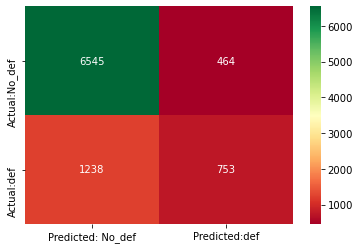

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(random_state=7)
rf_class.fit(X3_train, y3_train)
rf_pred_train = rf_class.predict(X3_train)
print('Accuracy on Training Sample: ', accuracy_score(y3_train, rf_pred_train))

rf_pred_test = rf_class.predict(X3_test)
rf_test_score = accuracy_score(y3_test, rf_pred_test)

cm_rf_train = confusion_matrix(y3_test, rf_pred_test)
cm_rf_train = pd.DataFrame(data=cm_rf_train, columns=['Predicted: No_def','Predicted:def'],index=['Actual:No_def','Actual:def'])
sns.heatmap(cm_rf_train,annot=True,fmt ='d',cmap='RdYlGn')


print("Test Accuracy:", accuracy_score(y3_test, rf_pred_test))

print("Test Precision:", precision_score(y3_test, rf_pred_test))

print("Test Recall Score:", recall_score(y3_test, rf_pred_test))

print(f"Test f1_score:", f1_score(y3_test, rf_pred_test))

print(f"Test ROC Area:", roc_auc_score(y3_test, rf_pred_test))

print(f"Test Mean Absolute Error:", mean_absolute_error(y3_test, rf_pred_test))


In [55]:
#Making new training set by moving 30% of train and using random forest classifier
rf_class2 = RandomForestClassifier(random_state=7)

rf_class2.fit(X3_train2, y3_train2)

rf_pred_train2 = rf_class2.predict(X3_train2)


print("Accuracy on training set with 30% move:", accuracy_score(y3_train2, rf_pred_train2))

#Applying to new test set
rf_pred_test2 = rf_class2.predict(X3_test2)

print("Accuracy on test set with 30% move:", accuracy_score(y3_test2, rf_pred_test2))

Accuracy on training set with 30% move: 0.9823333333333333
Accuracy on test set with 30% move: 0.8065555555555556


In [56]:
#Making new training set by moving 60% of train
rf_class3 = RandomForestClassifier(random_state=7)
rf_class3.fit(X3_train3, y3_train3)

rf_pred_train3 = rf_class3.predict(X3_train3)


print("Accuracy on training set with 60% move:", accuracy_score(y3_train3, rf_pred_train3))

#Applying to new test set
rf_pred_test3 = rf_class3.predict(X3_test3)

print("Accuracy on test set with 60% move:", accuracy_score(y3_test3, rf_pred_test3))

Accuracy on training set with 60% move: 0.9873333333333333
Accuracy on test set with 60% move: 0.7988148148148149


Conclusion: 

The decision tree classifier may overfit the training samples, depending on the size of training instances and the hyperparameters used. For this reason, there is a need to carry out cross validation and prediction on test data sets to determine how well our model generalizes to unseen examples.

The tuning of hyperparameters has an effect on how well our model generalizes and optimal tuning parameters are usually required to fit our model.

From the experiments carried out, as the size of the training set decreased, so did the accuracy of the model in predicting unseen examples.

For the same amount of amount of testing and training samples, a random forest classifier is seen to have a greater accuracy in predicting unseen samples.

<h3> Linear Classification, MLP and CNN

<h4>Linear Classification

In [69]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=7, max_iter=1000)

In [70]:
lgrscores = cross_val_score(lgr, X=X_train, y=y_train, cv=10)

print('Cross Validation accuracy scores: %s' % lgrscores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(lgrscores),np.std(lgrscores)))

Cross Validation accuracy scores: [0.8252381  0.82047619 0.81619048 0.82809524 0.80952381 0.81761905
 0.81       0.80904762 0.82809524 0.80857143]
Cross Validation accuracy: 0.817 +/- 0.008


In [71]:
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [73]:
y_train_pred_lgr = lgr.predict(X_train)

print("Accuracy_train:", accuracy_score(y_train, y_train_pred_lgr))

print("Precision_train:", precision_score(y_train, y_train_pred_lgr))

print("Recall Score_train:", recall_score(y_train, y_train_pred_lgr))

print(f"f1_score_train:", f1_score(y_train, y_train_pred_lgr))

print(f"ROC Area_train:", roc_auc_score(y_train, y_train_pred_lgr))

print(f"Mean Absolute Error_train:", mean_absolute_error(y_train, y_train_pred_lgr))

Accuracy_train: 0.8177142857142857
Precision_train: 0.6834306241580602
Recall Score_train: 0.32766415500538215
f1_score_train: 0.44295692665890574
ROC Area_train: 0.642279035619475
Mean Absolute Error_train: 0.18228571428571427


In [74]:
y_test_pred_lgr = lgr.predict(X_test)

print("Accuracy_test:", accuracy_score(y_test, y_test_pred_lgr))

print("Precision_test:", precision_score(y_test, y_test_pred_lgr))

print("Recall Score_test:", recall_score(y_test, y_test_pred_lgr))

print(f"f1_score_test:", f1_score(y_test, y_test_pred_lgr))

print(f"ROC Area_test:", roc_auc_score(y_test, y_test_pred_lgr))

print(f"Mean Absolute Error_test:", mean_absolute_error(y_test, y_test_pred_lgr))

Accuracy_test: 0.8204444444444444
Precision_test: 0.6895854398382204
Recall Score_test: 0.3425414364640884
f1_score_test: 0.4577181208053691
ROC Area_test: 0.649370304478299
Mean Absolute Error_test: 0.17955555555555555


The linear regressor gives an accuracy of 82% on the test data. From the accuracy obtained on the logistic regression, it is seen that the data is not linearly seperable, as the accuracy is less than 100%

<h3>MLP

In [77]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier(random_state=7)
mlp1.fit(X_train, y_train)

MLPClassifier(random_state=7)

In [182]:
#Base case prediction for training set
y_pred_mlp1_train = mlp1.predict(X_train)

print("Accuracy_train:", accuracy_score(y_train, y_pred_mlp1_train))

Accuracy_train: 0.8254761904761905


In [80]:
#Base case prediction for test set
y_pred_mlp1_test = mlp1.predict(X_test)

print("Accuracy_test:", accuracy_score(y_test, y_pred_mlp1_test))

Accuracy_test: 0.8195555555555556


<h4>Experimenting on different network parameters
    

In [102]:
hidden_layer_sizes = [(10,1), (10,2), (10,3), (120,1), (120,2), (120,3)]
activation = ['identity', 'logistic', 'tanh', 'relu']
alpha = [0.000001, 0.00001, 0.0001]
solver = ['lbfgs', 'sgd', 'adam']
learning_rate = [0.01, 0.1, 0.5, 0.7, 0.9]
momentum = [0.5, 0.9, 0.99]
epochs = [50, 100, 200, 500]

In [100]:
for hls in hidden_layer_sizes:
    mlp_hls = MLPClassifier(random_state=7, hidden_layer_sizes = hls)
    mlp_hls.fit(X_train, y_train)
    mlp_hls_pred_test = mlp_hls.predict(X_test)
    print(f"Accuracy prediction_hidden_layer_size {hls}: {round(accuracy_score(y_test, mlp_hls_pred_test), 2)}")

Accuracy prediction_hidden_layer_size (10, 1): 0.82
Accuracy prediction_hidden_layer_size (10, 2): 0.82
Accuracy prediction_hidden_layer_size (10, 3): 0.82
Accuracy prediction_hidden_layer_size (120, 1): 0.78
Accuracy prediction_hidden_layer_size (120, 2): 0.81
Accuracy prediction_hidden_layer_size (120, 3): 0.82


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
for act in activation:
    mlp_act = MLPClassifier(random_state=7, activation = act)
    mlp_act.fit(X_train, y_train)
    mlp_act_pred_test = mlp_act.predict(X_test)
    print(f"Accuracy prediction_activation {act}: {round(accuracy_score(y_test, mlp_act_pred_test), 2)}")

Accuracy prediction_activation identity: 0.82
Accuracy prediction_activation logistic: 0.82
Accuracy prediction_activation tanh: 0.82
Accuracy prediction_activation relu: 0.82


In [88]:
for alp in alpha:
    mlp_alp = MLPClassifier(random_state=7, alpha = alp)
    mlp_alp.fit(X_train, y_train)
    mlp_alp_pred_test = mlp_alp.predict(X_test)
    print(f"Accuracy alpha {alp}: {round(accuracy_score(y_test, mlp_alp_pred_test), 2)}")

Accuracy alpha 1e-06: 0.82
Accuracy alpha 1e-05: 0.82
Accuracy alpha 0.0001: 0.82


In [89]:
for slv in solver:
    mlp_slv = MLPClassifier(random_state=7, solver = slv)
    mlp_slv.fit(X_train, y_train)
    mlp_slv_pred_test = mlp_slv.predict(X_test)
    print(f"Accuracy alpha {slv}: {round(accuracy_score(y_test, mlp_slv_pred_test), 2)}")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy alpha lbfgs: 0.82
Accuracy alpha sgd: 0.82
Accuracy alpha adam: 0.82


In [95]:
for lnrt in learning_rate:
    mlp_lnrt = MLPClassifier(random_state=7, learning_rate_init = lnrt)
    mlp_lnrt.fit(X_train, y_train)
    mlp_lnrt_pred_test = mlp_lnrt.predict(X_test)
    print(f"Accuracy alpha {lnrt}: {round(accuracy_score(y_test, mlp_lnrt_pred_test), 2)}")

Accuracy alpha 0.01: 0.82
Accuracy alpha 0.1: 0.82
Accuracy alpha 0.5: 0.78
Accuracy alpha 0.7: 0.78
Accuracy alpha 0.9: 0.78


In [96]:
for moment in momentum:
    mlp_moment = MLPClassifier(random_state=7, momentum = moment)
    mlp_moment.fit(X_train, y_train)
    mlp_moment_pred_test = mlp_moment.predict(X_test)
    print(f"Accuracy momentum {moment}: {round(accuracy_score(y_test, mlp_moment_pred_test), 2)}")

Accuracy momentum 0.5: 0.82
Accuracy momentum 0.9: 0.82
Accuracy momentum 0.99: 0.82


In [106]:
for epoch in epochs:
    mlp_epoch = MLPClassifier(random_state=7, max_iter = epoch)
    mlp_epoch.fit(X_train, y_train)
    mlp_epoch_pred_test = mlp_epoch.predict(X_test)
    print(f"Accuracy epoch {epoch}: {round(accuracy_score(y_test, mlp_epoch_pred_test), 2)}")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy epoch 50: 0.82


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy epoch 100: 0.82
Accuracy epoch 200: 0.82
Accuracy epoch 500: 0.82


From the results obtained on different hyperparameters, it is seen that tweaking the hyperparameters does not affect accuracy so much. This can be attributed to the relative simplicity of the chosen dataset.

For this reason, no attempt to use a convolutional neural network was made.

<h3> Research Question - Effect of Imbalance and Random Undersampling of Data

During data collection, we cannot always be sure of equally sampling all classes, and this can lead to problems with under sampling of a particular class. In this research, I try to compare the effect of undersampling to balance classes and class imbalance on test predictions.

The aim of this research question is to compare how data imbalance affects performance metrics, as compared to randomly undersampling the majority classes by creating a balance across all classes. In this research, a new randomnly undersampled dataset will be created and several already noted ML algorithms will be applied to this new dataset. Different metrices will be applied to determine how this new dateset performances against the previously set aside test set.

The algorithms considered are:
1. Naive Bayes
2. Decision Tree
3. Logistic Regression

In [163]:
#Random undersampling of majority class
number_of_default = len(loan_prepared[loan_prepared['default_next'] == 1])
non_default_indices = loan_prepared[loan_prepared.default_next == 0].index

random_indices_non_default = np.random.choice(non_default_indices, number_of_default, replace=False)
default_indices = loan_prepared[loan_prepared.default_next == 1].index
under_sample_indices = np.concatenate([default_indices, random_indices_non_default])

under_sample = loan_prepared.loc[under_sample_indices]
print(under_sample.default_next.value_counts())
under_sample.head()

1    6636
0    6636
Name: default_next, dtype: int64


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next
0,0.010101,2,2,1,0.051724,2,2,0,0,0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0.111111,2,2,2,0.086207,0,2,0,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
13,0.060606,1,2,2,0.155172,1,2,2,0,0,...,0.223046,0.116480,0.289331,0.003663,0.000000,0.003348,0.004831,0.003517,0.000000,1
16,0.010101,1,1,2,0.051724,0,0,2,2,2,...,0.177412,0.098402,0.275660,0.003663,0.000000,0.001674,0.000000,0.003868,0.000000,1
21,0.111111,2,2,1,0.310345,0,0,0,0,0,...,0.160138,0.081275,0.261222,0.000362,0.000188,0.000000,0.001018,0.000741,0.000000,1


In [167]:
X_under = under_sample.iloc[:,:-1].values
y_under = under_sample.iloc[:,-1].values

<h3> Naive Bayes

In [168]:
#Training on all new samples and testing on 
from sklearn.naive_bayes import MultinomialNB 
naive_bayes_under = MultinomialNB(alpha=0.1) 
naive_bayes_under.fit(X_under, y_under)

MultinomialNB(alpha=0.1)

In [171]:
y_pred_under = naive_bayes_under.predict(X_test)
print(y_pred_under)

print("Accuracy:", accuracy_score(y_test, y_pred_under))

print("Precision:", precision_score(y_test, y_pred_under))

print("Recall Score:", recall_score(y_test, y_pred_under))

print(f"f1_score:", f1_score(y_test, y_pred_under))

[0 0 0 ... 0 1 1]
Accuracy: 0.7828888888888889
Precision: 0.5092638958437656
Recall Score: 0.5107985936715218
f1_score: 0.5100300902708124


Undersampling vs Imbalance:

We obtain an accuracy of 78%, as compared to 80% using the complete unbalanced dataset

For precision, we obtain 51%, as compared to 57%

For Recall, we obtain a recall of 51%, as compared to 44%

An f1 score of 51%, as compared to 50%

From here, it is seen that undersampling has only slightly improved the recall and f1 scores

<h3> Decision Tree

In [174]:
DT_class_under = DecisionTreeClassifier(random_state=7)
DT_class_under.fit(X_under, y_under)

DecisionTreeClassifier(random_state=7)

In [177]:
y_pred_under_DT = DT_class_under.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_under_DT))

print("Precision:", precision_score(y_test, y_pred_under_DT))

print("Recall Score:", recall_score(y_test, y_pred_under_DT))

print(f"f1_score:", f1_score(y_test, y_pred_under_DT))

Accuracy: 0.7926666666666666
Precision: 0.5162211263950168
Recall Score: 0.9989954796584631
f1_score: 0.6806981519507187


Undersampling vs Class inbalance:

Using a base case decision tree classifier, the following were obtained.

An accuracy of 79%, as compared to 73%

A precision of 52%, as compared to 40%

A recall score of 99%, as compared to 43%

An f1 score of 68%, as compared to 62%

Overall, the decision tree classifier seems to work better with the balanced undersample dataset, as compared to the unbalanced dataset

<h3> Logistic Regression

In [179]:
lgr_under = LogisticRegression(random_state=7, max_iter=1000)

lgr_under.fit(X_under, y_under)

LogisticRegression(max_iter=1000, random_state=7)

In [181]:
y_pred_lgr_under = lgr_under.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lgr_under))

print("Precision:", precision_score(y_test, y_pred_lgr_under))

print("Recall Score:", recall_score(y_test, y_pred_lgr_under))

print(f"f1_score:", f1_score(y_test, y_pred_lgr_under))

Accuracy: 0.7824444444444445
Precision: 0.5073105892778024
Recall Score: 0.5750878955298845
f1_score: 0.5390772128060264


Undersampling vs Class inbalance:

Using a base case logistic regressor, the following were obtained.

An accuracy of 78%, as compared to 82%

A precision of 51%, as compared to 69%

A recall score of 58%, as compared to 34%

An f1 score of 54%, as compared to 46%

The logistic regressor seems to predict more accurately on the unbalanced data, as compared to the undersampled data

Conclusion:
From the experiments carried out, it can be seen that different algorithms work better with the unbalanced dataset, as compared to others. For the Naive Bayes and logistic regression algorithms, the predictions were more accurate on the inbalanced dataset, given more training instances. However, the decion tree classifier seemed to make more accurate predictions with the balanced dataset.

The results of this study are not conclusive, as only the base case of the algorithms were tested. It should also be noted that for the balanced dataset, a little bias exists due to the fact that the test instances may have been seen by the training instances.